In [3]:
using DataFrames, Impute, CSV,Statistics,VegaLite,Dates,ScikitLearn,TimeSeries,Measures,Plots,Clustering,NumPyArrays, PyCall,MLJModels,MLLabelUtils
using MLJ,MLJFlux,Flux



In [4]:
using ScikitLearn.CrossValidation: train_test_split
@sk_import preprocessing: (LabelEncoder)

PyObject <class 'sklearn.preprocessing._label.LabelEncoder'>

In [5]:
pyplot() 
data = CSV.read("/home/useeffect/Desktop/Kaggle/seattle-weather.csv",DataFrame)
println(typeof(data))
println(describe(data))


DataFrame
6×7 DataFrame
 Row │ variable       mean     min         median      max         nmissing  eltype   
     │ Symbol         Union…   Any         Any         Any         Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────────
   1 │ date                    2012-01-01  2013-12-31  2015-12-31         0  Date
   2 │ precipitation  3.02943  0.0         0.0         55.9               0  Float64
   3 │ temp_max       16.4391  -1.6        15.6        35.6               0  Float64
   4 │ temp_min       8.23477  -7.1        8.3         18.3               0  Float64
   5 │ wind           3.24114  0.4         3.0         9.5                0  Float64
   6 │ weather                 drizzle                 sun                0  String


In [6]:
names(data)

6-element Vector{String}:
 "date"
 "precipitation"
 "temp_max"
 "temp_min"
 "wind"
 "weather"

In [7]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,date,,2012-01-01,2013-12-31,2015-12-31,0,Date
2,precipitation,3.02943,0.0,0.0,55.9,0,Float64
3,temp_max,16.4391,-1.6,15.6,35.6,0,Float64
4,temp_min,8.23477,-7.1,8.3,18.3,0,Float64
5,wind,3.24114,0.4,3.0,9.5,0,Float64
6,weather,,drizzle,,sun,0,String


In [8]:
select(data, Not(:date))

,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,String
1,0.0,12.8,5.0,4.7,drizzle
2,10.9,10.6,2.8,4.5,rain
3,0.8,11.7,7.2,2.3,rain
4,20.3,12.2,5.6,4.7,rain
5,1.3,8.9,2.8,6.1,rain
6,2.5,4.4,2.2,2.2,rain
7,0.0,7.2,2.8,2.3,rain
8,0.0,10.0,2.8,2.0,sun
9,4.3,9.4,5.0,3.4,rain


In [9]:
summary(data)

"1461×6 DataFrame"

In [10]:
# ux = unique(data.weather); 
# transform!(data, @. :weather => ByRow(isequal(ux)) .=> Symbol(ux))


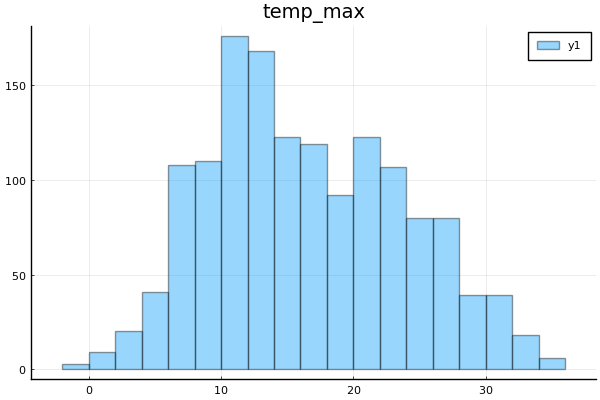

In [11]:
histogram(data.temp_max,bins=20, alpha=0.4,title="temp_max")


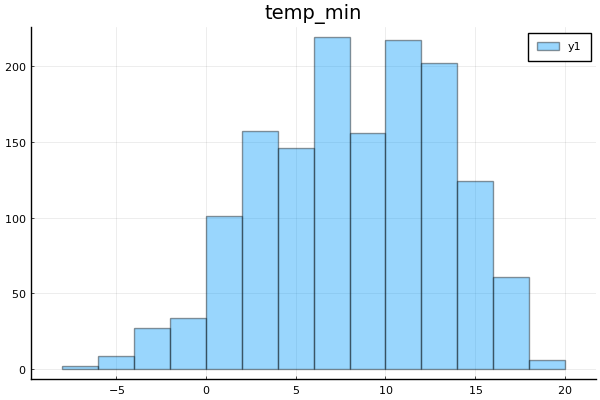

In [12]:
histogram(data.temp_min,bins=20, alpha=0.4,title="temp_min")


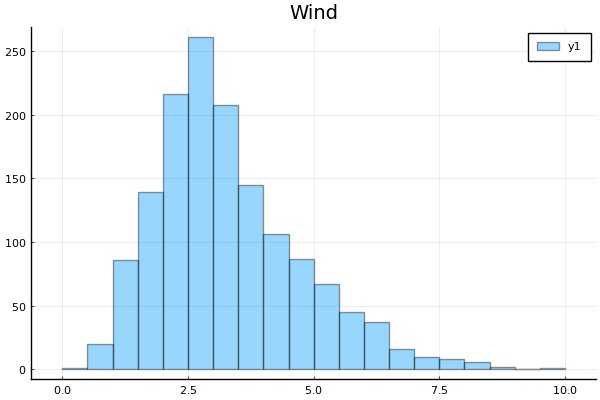

In [13]:
histogram(data.wind,bins=20, alpha=0.4,title="Wind")


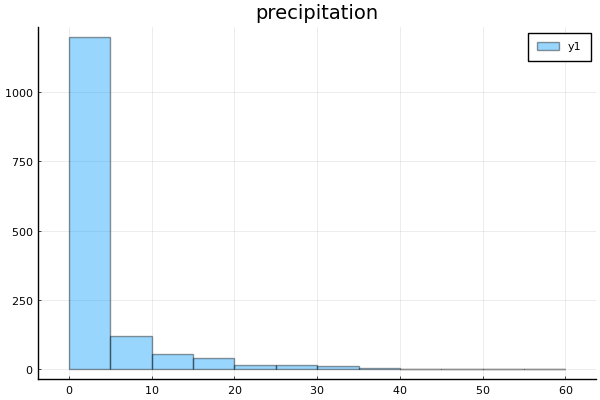

In [14]:
histogram(data.precipitation,bins=20, alpha=0.4,title="precipitation")

In [15]:
select!(data, Not(:date))



,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,String
1,0.0,12.8,5.0,4.7,drizzle
2,10.9,10.6,2.8,4.5,rain
3,0.8,11.7,7.2,2.3,rain
4,20.3,12.2,5.6,4.7,rain
5,1.3,8.9,2.8,6.1,rain
6,2.5,4.4,2.2,2.2,rain
7,0.0,7.2,2.8,2.3,rain
8,0.0,10.0,2.8,2.0,sun
9,4.3,9.4,5.0,3.4,rain


In [16]:
data2 = data
names(data2)

5-element Vector{String}:
 "precipitation"
 "temp_max"
 "temp_min"
 "wind"
 "weather"

In [17]:
# select!(data,Not(:weather))

In [18]:
cors = cor(Matrix(select!(data,Not(:weather))))

4×4 Matrix{Float64}:
  1.0       -0.228555  -0.072684    0.328045
 -0.228555   1.0        0.875687   -0.164857
 -0.072684   0.875687   1.0        -0.0741852
  0.328045  -0.164857  -0.0741852   1.0

In [19]:
data3 = CSV.read("/home/useeffect/Desktop/Kaggle/seattle-weather.csv",DataFrame)

,date,precipitation,temp_max,temp_min,wind,weather
,Date,Float64,Float64,Float64,Float64,String
1,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-02,10.9,10.6,2.8,4.5,rain
3,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-04,20.3,12.2,5.6,4.7,rain
5,2012-01-05,1.3,8.9,2.8,6.1,rain
6,2012-01-06,2.5,4.4,2.2,2.2,rain
7,2012-01-07,0.0,7.2,2.8,2.3,rain
8,2012-01-08,0.0,10.0,2.8,2.0,sun
9,2012-01-09,4.3,9.4,5.0,3.4,rain


In [20]:
select(data3, Not(:date))

,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,String
1,0.0,12.8,5.0,4.7,drizzle
2,10.9,10.6,2.8,4.5,rain
3,0.8,11.7,7.2,2.3,rain
4,20.3,12.2,5.6,4.7,rain
5,1.3,8.9,2.8,6.1,rain
6,2.5,4.4,2.2,2.2,rain
7,0.0,7.2,2.8,2.3,rain
8,0.0,10.0,2.8,2.0,sun
9,4.3,9.4,5.0,3.4,rain


In [21]:

gr()

Plots.GRBackend()

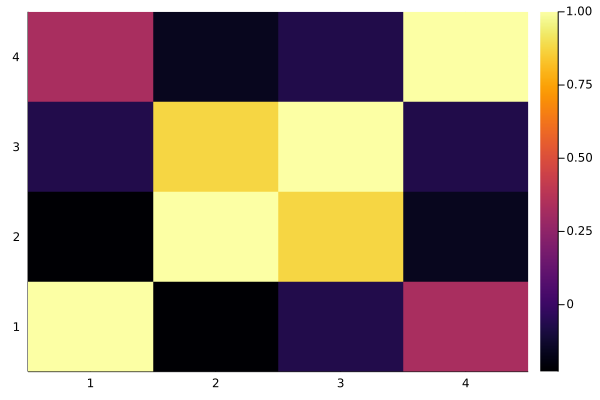

In [22]:
Plots.heatmap(cors)

In [23]:
names(data)
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,precipitation,3.02943,0.0,0.0,55.9,0,Float64
2,temp_max,16.4391,-1.6,15.6,35.6,0,Float64
3,temp_min,8.23477,-7.1,8.3,18.3,0,Float64
4,wind,3.24114,0.4,3.0,9.5,0,Float64


In [24]:
coerce!(data, :weather => OrderedFactor{6});

In [25]:
describe(data3)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,date,,2012-01-01,2013-12-31,2015-12-31,0,Date
2,precipitation,3.02943,0.0,0.0,55.9,0,Float64
3,temp_max,16.4391,-1.6,15.6,35.6,0,Float64
4,temp_min,8.23477,-7.1,8.3,18.3,0,Float64
5,wind,3.24114,0.4,3.0,9.5,0,Float64
6,weather,,drizzle,,sun,0,String


In [26]:
names(data3)

6-element Vector{String}:
 "date"
 "precipitation"
 "temp_max"
 "temp_min"
 "wind"
 "weather"

In [27]:
select(data3, Not(:date))

,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,String
1,0.0,12.8,5.0,4.7,drizzle
2,10.9,10.6,2.8,4.5,rain
3,0.8,11.7,7.2,2.3,rain
4,20.3,12.2,5.6,4.7,rain
5,1.3,8.9,2.8,6.1,rain
6,2.5,4.4,2.2,2.2,rain
7,0.0,7.2,2.8,2.3,rain
8,0.0,10.0,2.8,2.0,sun
9,4.3,9.4,5.0,3.4,rain


In [28]:
enc = labelenc(data3.weather)

MLLabelUtils.LabelEnc.NativeLabels{String, 5, typeof(identity)}(identity, ["drizzle", "rain", "sun", "snow", "fog"], Dict("fog" => 5, "sun" => 3, "snow" => 4, "rain" => 2, "drizzle" => 1))

In [29]:
convertlabel(LabelEnc.OneOfK{Int64}, data3.weather)

5×1461 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  0  1  1  0  0  0     1  1  1  1  1  1  0  1  1  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  1  1     0  0  0  0  0  0  1  0  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0

In [30]:
data3.weather

1461-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "drizzle"
 "rain"
 "rain"
 "rain"
 "rain"
 "rain"
 "rain"
 "sun"
 "rain"
 "rain"
 "sun"
 "sun"
 "sun"
 ⋮
 "rain"
 "rain"
 "rain"
 "rain"
 "rain"
 "rain"
 "sun"
 "rain"
 "rain"
 "fog"
 "sun"
 "sun"

In [31]:
# for i in data3.weather
#     if i == "rain"
#         data3[!,:i]= 1        
#     elseif i == "sun"
#         i=2
#     elseif i =="drizzle"
#         i=3
#     elseif i == "fog"
#         i=4
#     elseif i =="snow"
#         i=5
#     end
#     i = i
   
# end

In [32]:
# using PrettyPrinting,MLJ
# using ScikitLearn



In [33]:
# DTC = @load DecisionTreeClassifier pkg=DecisionTree
# @sk_import preprocessing: (LabelEncoder)


In [34]:
# @load DecisionTreeClassifier
# pp = @pipeline OneHotDTC(
#                 X -> coerce(X, :make=>Multiclass),
#                 hot = OneHotEncoder(),
#                 dtc = DecisionTreeClassifier())
# X = select(data3, Not(:weather))
# y = data3.weather
# dtm = machine(pp, X, y)
# fit!(dtm)
data3.weather=LabelEncoder().fit_transform(data3.weather)

1461-element Vector{Int64}:
 0
 2
 2
 2
 2
 2
 2
 4
 2
 2
 4
 4
 4
 ⋮
 2
 2
 2
 2
 2
 2
 4
 2
 2
 1
 4
 4

In [35]:
data3.weather

1461-element Vector{Int64}:
 0
 2
 2
 2
 2
 2
 2
 4
 2
 2
 4
 4
 4
 ⋮
 2
 2
 2
 2
 2
 2
 4
 2
 2
 1
 4
 4

In [36]:
# using ScikitLearn.CrossValidation: train_test_split


In [37]:
first(data3)


,date,precipitation,temp_max,temp_min,wind,weather
,Date,Float64,Float64,Float64,Float64,Int64
1,2012-01-01,0.0,12.8,5.0,4.7,0


In [38]:
select!(data3, Not(:date))

,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,Int64
1,0.0,12.8,5.0,4.7,0
2,10.9,10.6,2.8,4.5,2
3,0.8,11.7,7.2,2.3,2
4,20.3,12.2,5.6,4.7,2
5,1.3,8.9,2.8,6.1,2
6,2.5,4.4,2.2,2.2,2
7,0.0,7.2,2.8,2.3,2
8,0.0,10.0,2.8,2.0,4
9,4.3,9.4,5.0,3.4,2


In [39]:
Tables.Matrix(data3)

1461×5 Matrix{Float64}:
  0.0  12.8   5.0  4.7  0.0
 10.9  10.6   2.8  4.5  2.0
  0.8  11.7   7.2  2.3  2.0
 20.3  12.2   5.6  4.7  2.0
  1.3   8.9   2.8  6.1  2.0
  2.5   4.4   2.2  2.2  2.0
  0.0   7.2   2.8  2.3  2.0
  0.0  10.0   2.8  2.0  4.0
  4.3   9.4   5.0  3.4  2.0
  1.0   6.1   0.6  3.4  2.0
  0.0   6.1  -1.1  5.1  4.0
  0.0   6.1  -1.7  1.9  4.0
  0.0   5.0  -2.8  1.3  4.0
  ⋮                     
  4.3   7.8   4.4  6.7  2.0
 27.4   5.6   2.8  4.3  2.0
  4.6   7.8   2.8  5.0  2.0
  6.1   5.0   2.8  7.6  2.0
  2.5   5.6   2.2  4.3  2.0
  5.8   5.0   2.2  1.5  2.0
  0.0   4.4   0.0  2.5  4.0
  8.6   4.4   1.7  2.9  2.0
  1.5   5.0   1.7  1.3  2.0
  0.0   7.2   0.6  2.6  1.0
  0.0   5.6  -1.0  3.4  4.0
  0.0   5.6  -2.1  3.5  4.0

In [40]:
data3 = coerce(data3, Count => Continuous)

,precipitation,temp_max,temp_min,wind,weather
,Float64,Float64,Float64,Float64,Float64
1,0.0,12.8,5.0,4.7,0.0
2,10.9,10.6,2.8,4.5,2.0
3,0.8,11.7,7.2,2.3,2.0
4,20.3,12.2,5.6,4.7,2.0
5,1.3,8.9,2.8,6.1,2.0
6,2.5,4.4,2.2,2.2,2.0
7,0.0,7.2,2.8,2.3,2.0
8,0.0,10.0,2.8,2.0,4.0
9,4.3,9.4,5.0,3.4,2.0


In [41]:
x = select(data3, Not([ :weather]))
y = data3.weather;

In [42]:
# using ScikitLearn.CrossValidation: cross_val_score
# # @sk_import linear_model: LogisticRegression
# using MLJ,PrettyPrinting
# @sk_import preprocessing: StandardScaler


In [43]:
# using ScikitLearn.CrossValidation: train_test_split

In [44]:
# x = fit_transform!(StandardScaler(), x)
# Y = fit(Y)

In [45]:
size(x)

(1461, 4)

In [46]:
size(y)

(1461,)

In [47]:
 # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4)

In [48]:
# model = LogisticRegression(fit_intercept=true)
y,x = unpack(data3, ==(:weather),name->true;rng=123)
first(x,1) |> pretty

┌───────────────┬────────────┬────────────┬────────────┐
│ precipitation │ temp_max   │ temp_min   │ wind       │
│ Float64       │ Float64    │ Float64    │ Float64    │
│ Continuous    │ Continuous │ Continuous │ Continuous │
├───────────────┼────────────┼────────────┼────────────┤
│ 0.0           │ 23.3       │ 12.2       │ 2.1        │
└───────────────┴────────────┴────────────┴────────────┘


In [49]:
# ScikitLearn.fit!(model, x, Y)
# accuracy = sum(predict(model, x) .== Y) / length(Y)
# println("accuracy: $accuracy")
models(matching(x,y))


59-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :deep_properties, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = ARDRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostRegressor, package_name = ScikitLearn, ... )
 (name = BaggingRegressor, package_name = ScikitLearn, ... )
 (name = BayesianRidgeRegressor, package_name = ScikitLearn, ... )
 (name = ConstantRegressor, package_name = MLJModels, ... )
 (name = DecisionTreeRegressor, package_name = BetaML, ... )
 (name = DecisionTreeRegressor, package_name = DecisionTree, ... )
 (name = DeterministicConstantRegressor, package_name = MLJModels, ... )
 (name = DummyRegressor, package_name

In [50]:
describe(data3)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,precipitation,3.02943,0.0,0.0,55.9,0,Float64
2,temp_max,16.4391,-1.6,15.6,35.6,0,Float64
3,temp_min,8.23477,-7.1,8.3,18.3,0,Float64
4,wind,3.24114,0.4,3.0,9.5,0,Float64
5,weather,2.75222,0.0,2.0,4.0,0,Float64


In [51]:
Tree = @load LinearCountRegressor pkg=GLM


import MLJGLMInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/useeffect/.julia/packages/MLJModels/w0uSt/src/loading.jl:168


MLJGLMInterface.LinearCountRegressor

In [52]:
tree = Tree()

LinearCountRegressor(
    fit_intercept = true,
    distribution = Distributions.Poisson{Float64}(λ=1.0),
    link = GLM.LogLink(),
    offsetcol = nothing,
    maxiter = 30,
    atol = 1.0e-6,
    rtol = 1.0e-6,
    minstepfac = 0.001,
    report_keys = [:deviance, :dof_residual, :stderror, :vcov, :coef_table]) @164

In [53]:
train, test = MLJ.partition(collect(eachindex(y)), 0.70, rng=52)

([446, 422, 134, 1053, 552, 194, 1291, 380, 396, 1125  …  427, 1129, 1246, 231, 1032, 1110, 33, 438, 130, 190], [550, 342, 1133, 758, 1212, 398, 1028, 193, 684, 1024  …  915, 1055, 734, 733, 867, 1054, 596, 754, 1171, 48])

In [54]:
mutable struct MyNetworkBuilder <: MLJFlux.Builder
    n1::Int #Number of cells in the first hidden layer
    n2::Int #Number of cells in the second hidden layer
end


In [55]:
function MLJFlux.build(model::MyNetworkBuilder, rng, n_in, n_out)
    init = Flux.glorot_uniform(rng)
    layer1 = Flux.Dense(n_in, model.n1, init=init)
    layer2 = Flux.Dense(model.n1, model.n2, init=init)
    layer3 = Flux.Dense(model.n2, n_out, init=init)
    return Flux.Chain(layer1, layer2, layer3)
end

In [56]:
myclassifier = MyNetworkBuilder(20, 10)

MyNetworkBuilder @801


In [57]:
NeuralNetworkClassifier = @load NeuralNetworkRegressor
clf = NeuralNetworkClassifier()

import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/useeffect/.julia/packages/MLJModels/w0uSt/src/loading.jl:168


NeuralNetworkRegressor(
    builder = Linear(
            σ = NNlib.relu),
    optimiser = ADAM(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}()),
    loss = Flux.Losses.mse,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing)) @417

In [58]:
schema(data3)

┌───────────────┬─────────┬────────────┐
│ _.names       │ _.types │ _.scitypes │
├───────────────┼─────────┼────────────┤
│ precipitation │ Float64 │ Continuous │
│ temp_max      │ Float64 │ Continuous │
│ temp_min      │ Float64 │ Continuous │
│ wind          │ Float64 │ Continuous │
│ weather       │ Float64 │ Continuous │
└───────────────┴─────────┴────────────┘
_.nrows = 1461


In [59]:
mach = MLJ.machine(clf, x, y)
MLJ.fit!(mach,rows=train, verbosity=3)

training_loss = cross_entropy(MLJ.predict(mach, x), y) |> mean

┌ Info: Training Machine{NeuralNetworkRegressor{Linear,…},…} @149.
└ @ MLJBase /home/useeffect/.julia/packages/MLJBase/KWyqX/src/machines.jl:342
┌ Info: Loss is 2.561
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.756
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.537
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.404
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.322
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.271
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.24
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.219
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core.jl:143
┌ Info: Loss is 1.205
└ @ MLJFlux /home/useeffect/.julia/packages/MLJFlux/NTAl9/src/core

LoadError: MethodError: no method matching (::LogLoss{Float64})(::Vector{Float64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  (::LogLoss)([91m::MLJBase.UnivariateFiniteVector{S, V, R, P}[39m, ::AbstractVector) where {S, V, R, P} at ~/.julia/packages/MLJBase/KWyqX/src/measures/finite.jl:54
[0m  (::LogLoss)([91m::AbstractVector{<:UnivariateFinite}[39m, ::AbstractVector) at ~/.julia/packages/MLJBase/KWyqX/src/measures/finite.jl:47

In [60]:
preds = MLJ.predict(mach, x[test, :])

438-element Vector{Float64}:
 4.427631296217442
 2.468689620494842
 2.271581897139549
 2.363512696325779
 2.6590962089598182
 2.5693734735250473
 3.459381172060967
 2.2582937136292456
 2.5735040254890915
 2.8527807742357254
 3.0577674128115175
 2.2588819973170757
 3.8199292391538626
 ⋮
 1.8983948938548565
 2.9714013129472727
 4.174217689037324
 2.8744774505496027
 1.5778520464897157
 3.0996865607798103
 3.0980785533785826
 4.276897646486759
 2.963353651762009
 3.1862315446138387
 3.270359928160906
 4.350946976244449

In [61]:
println(preds[1:5])

[4.427631296217442, 2.468689620494842, 2.271581897139549, 2.363512696325779, 2.6590962089598182]
